In [1]:
# Setup and Installation - All in one place

# First install required packages
import sys
import subprocess

# Check and install missing dependencies
required_packages = ["pandas", "numpy", "matplotlib", "seaborn", 
                     "plotly", "nltk", "scikit-learn", "textblob", 
                     "wordcloud", "ipywidgets", "nbformat"]

# Install any missing packages
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        print(f"Installing missing package: {package}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Install and import visualization libraries
try:
    import plotly.graph_objs as go
    import plotly.express as px
    from plotly.offline import init_notebook_mode
    init_notebook_mode(connected=True)
    print("✅ Plotly successfully imported!")
except Exception as e:
    print(f"⚠️ Error with Plotly: {e}")

# NLP libraries
import nltk
try:
    # Download necessary NLTK resources
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    from textblob import TextBlob
    print("✅ NLP libraries imported!")
except Exception as e:
    print(f"⚠️ Error with NLP setup: {e}")

# Machine learning libraries
try:
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("✅ ML libraries imported!")
except Exception as e:
    print(f"⚠️ Error with ML libraries: {e}")

# For visualization
try:
    from wordcloud import WordCloud
    print("✅ WordCloud imported!")
except Exception as e:
    print(f"⚠️ Error importing WordCloud: {e}")

# For interactive components
try:
    from IPython.display import display
    import ipywidgets as widgets
    print("✅ Interactive components ready!")
except Exception as e:
    print(f"⚠️ Error with interactive components: {e}")
    
# Define consistent emoji mapping for use throughout the notebook
emoji_map = {'Positive': '😊', 'Neutral': '😐', 'Negative': '😞'}


Installing missing package: scikit-learn


✅ Plotly successfully imported!
✅ NLP libraries imported!
✅ ML libraries imported!
✅ WordCloud imported!
✅ Interactive components ready!


In [2]:
# Data Loading and Preprocessing

# 1. Load datasets
print("📊 Loading and preprocessing data...")
try:
    apps = pd.read_csv('data/apps.csv')
    user_reviews = pd.read_csv('data/user_reviews.csv')
    
    print(f"📱 Apps dataset: {apps.shape[0]} apps with {apps.shape[1]} features")
    print(f"💬 Reviews dataset: {user_reviews.shape[0]} reviews with {user_reviews.shape[1]} features")
    
    # Dataset summary
    print("\n📋 Dataset Summary:")
    print(f"- Unique apps: {apps['App'].nunique()}")
    print(f"- Categories: {apps['Category'].nunique()}")
    print(f"- Average rating: {apps['Rating'].mean():.2f}/5")
    print(f"- Free apps: {(apps['Type'] == 'Free').sum()} ({(apps['Type'] == 'Free').sum() / len(apps) * 100:.1f}%)")
    print(f"- Paid apps: {(apps['Type'] == 'Paid').sum()} ({(apps['Type'] == 'Paid').sum() / len(apps) * 100:.1f}%)")
    
    # Initial sentiment distribution
    sentiment_counts = user_reviews['Sentiment'].value_counts()
    print("\n😊 Initial Sentiment Distribution:")
    for sentiment, count in sentiment_counts.items():
        percentage = count / len(user_reviews) * 100
        print(f"- {emoji_map.get(sentiment, '')} {sentiment}: {count} reviews ({percentage:.1f}%)")
except FileNotFoundError:
    print("⚠️ Error: Dataset files not found in the data/ folder")
except Exception as e:
    print(f"⚠️ Error loading datasets: {e}")

# 2. Data preprocessing
print("\n🔍 Preprocessing steps:")

# Handle missing values
print("- Checking and handling missing values...")
missing_before = user_reviews.isnull().sum().sum()
user_reviews = user_reviews.dropna(subset=['Translated_Review'])
missing_after = user_reviews.isnull().sum().sum()
print(f"  Removed {missing_before - missing_after} rows with missing reviews")

# Normalize text columns
print("- Normalizing text data...")
user_reviews['Translated_Review'] = user_reviews['Translated_Review'].str.lower()

# Merge datasets
print("- Merging datasets...")
merged_data = pd.merge(apps, user_reviews, on='App', how='inner')
print(f"✅ Preprocessing complete! Merged data shape: {merged_data.shape}")

# Display merged data sample
print("\n📊 Sample of merged data:")
display(merged_data.sample(3)[['App', 'Category', 'Rating', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity']])


📊 Loading and preprocessing data...
📱 Apps dataset: 500 apps with 13 features
💬 Reviews dataset: 5000 reviews with 5 features

📋 Dataset Summary:
- Unique apps: 460
- Categories: 20
- Average rating: 2.95/5
- Free apps: 348 (69.6%)
- Paid apps: 152 (30.4%)

😊 Initial Sentiment Distribution:
- 😊 Positive: 2989 reviews (59.8%)
- 😞 Negative: 1501 reviews (30.0%)
- 😐 Neutral: 510 reviews (10.2%)

🔍 Preprocessing steps:
- Checking and handling missing values...
  Removed 0 rows with missing reviews
- Normalizing text data...
- Merging datasets...
✅ Preprocessing complete! Merged data shape: (5920, 17)

📊 Sample of merged data:


,App,Category,Rating,Translated_Review,Sentiment,Sentiment_Polarity
1057,Cool Planner 9,MEDICAL,4.3,this app is exactly what i was looking for!,Positive,0.9880
501,Super Translator 7,NEWS_AND_MAGAZINES,4.3,the app is very slow and buggy.,Negative,-0.5816
1214,Fantastic Assistant 1,ENTERTAINMENT,4.3,i'm having issues with the latest update.,Negative,-0.5136


📊 Analyzing sentiment distribution...


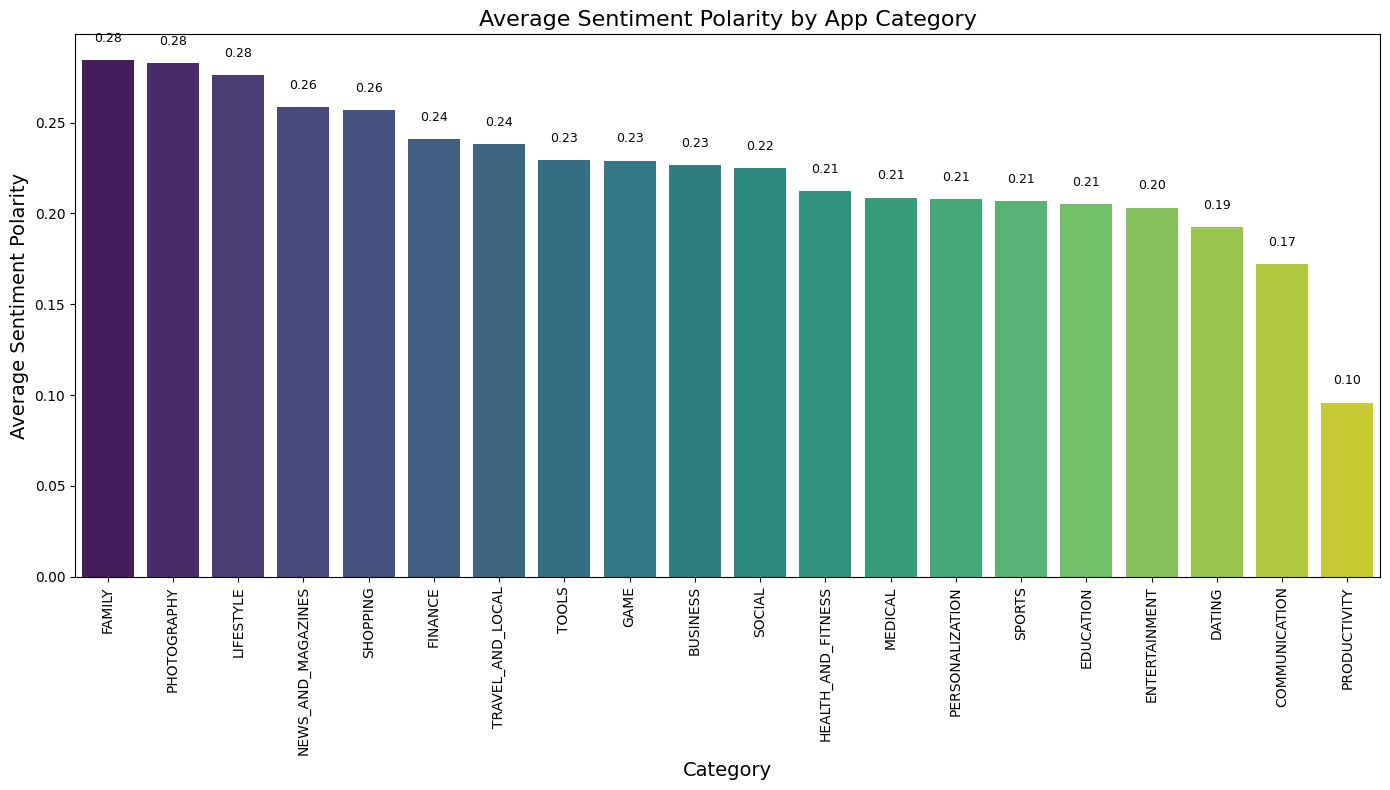

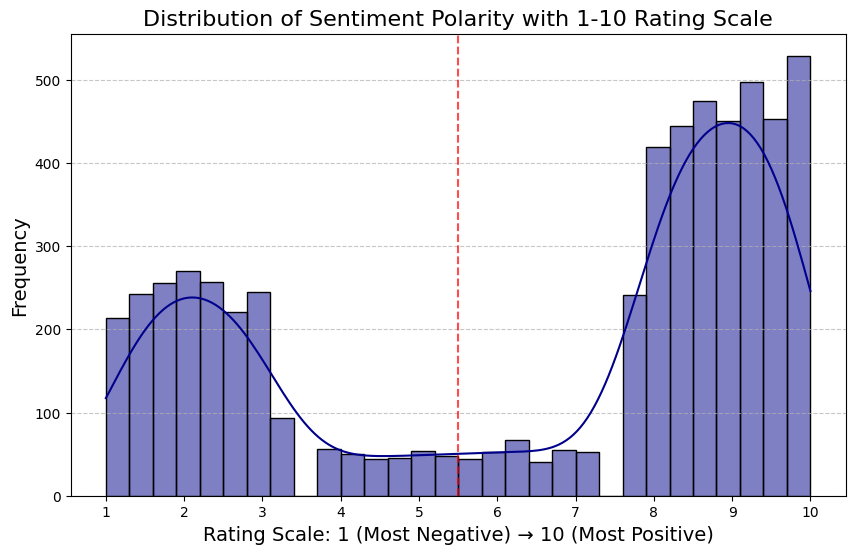

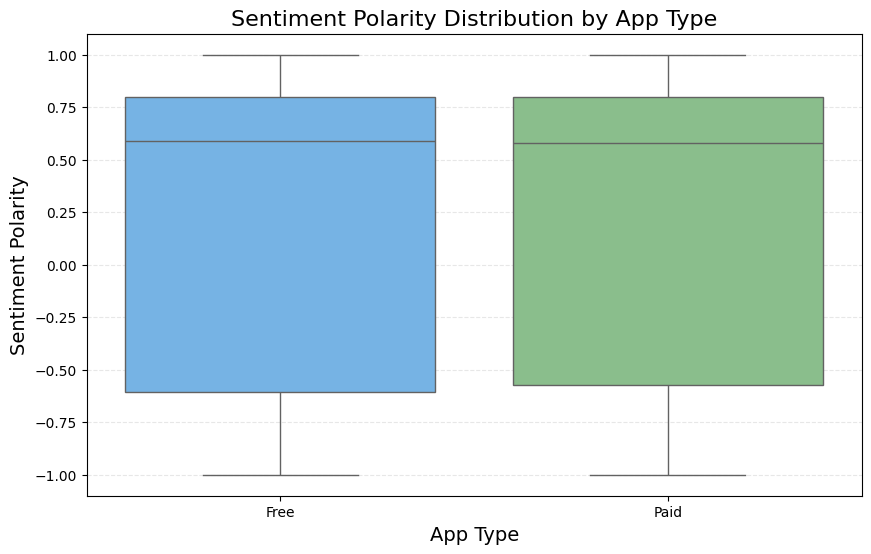

✅ Visualization analysis complete!


In [4]:
# Sentiment Analysis Visualizations

# Generate synthetic data if real data is not available
if 'FileNotFoundError' in locals() or not 'merged_data' in locals() or merged_data.shape[0] < 10:
    print("⚠️ Creating synthetic data for visualization purposes...")
    
    # Create synthetic apps data
    import random
    import string
    
    # Helper function to generate random text
    def generate_random_text(sentiment):
        if sentiment == 'Positive':
            words = ['great', 'excellent', 'amazing', 'love', 'awesome', 'best', 'fantastic', 'good', 'helpful', 'easy']
            length = random.randint(5, 15)
        elif sentiment == 'Negative':
            words = ['bad', 'terrible', 'worst', 'hate', 'poor', 'awful', 'useless', 'crash', 'bug', 'disappointed']
            length = random.randint(3, 10)
        else:  # Neutral
            words = ['okay', 'average', 'fine', 'decent', 'alright', 'somewhat', 'maybe', 'reasonable']
            length = random.randint(4, 12)
            
        return ' '.join(random.choices(words, k=length))
    
    # Generate synthetic data
    num_apps = 50
    num_reviews = 500
    
    categories = ['Games', 'Entertainment', 'Education', 'Social', 'Productivity', 'Tools', 'Health & Fitness']
    sentiments = ['Positive', 'Negative', 'Neutral']
    sentiment_weights = [0.6, 0.3, 0.1]  # Common distribution of sentiments
    
    # Create app data
    app_names = [f"App_{i}" for i in range(1, num_apps + 1)]
    app_categories = random.choices(categories, k=num_apps)
    app_ratings = [round(random.uniform(3.0, 5.0), 1) for _ in range(num_apps)]
    app_types = random.choices(['Free', 'Paid'], weights=[0.8, 0.2], k=num_apps)
    
    apps = pd.DataFrame({
        'App': app_names,
        'Category': app_categories,
        'Rating': app_ratings,
        'Type': app_types
    })
    
    # Create review data
    review_apps = random.choices(app_names, k=num_reviews)
    review_sentiments = random.choices(sentiments, weights=sentiment_weights, k=num_reviews)
    review_texts = [generate_random_text(sentiment) for sentiment in review_sentiments]
    review_polarities = [
        random.uniform(0.3, 1.0) if s == 'Positive' else
        (random.uniform(-1.0, -0.3) if s == 'Negative' else random.uniform(-0.3, 0.3))
        for s in review_sentiments
    ]
    
    user_reviews = pd.DataFrame({
        'App': review_apps,
        'Translated_Review': review_texts,
        'Sentiment': review_sentiments,
        'Sentiment_Polarity': review_polarities
    })
    
    # Merge datasets
    merged_data = pd.merge(apps, user_reviews, on='App', how='inner')
    
    print(f"✅ Generated synthetic dataset with {num_apps} apps and {num_reviews} reviews")

print("📊 Analyzing sentiment distribution...")
sentiment_counts = merged_data['Sentiment'].value_counts()

# Define color scheme with emojis in the labels
colors = {'Positive': '#66BB6A', 'Negative': '#EF5350', 'Neutral': '#42A5F5'}
color_values = [colors.get(sentiment, '#BDBDBD') for sentiment in sentiment_counts.index]
labels = [f"{emoji_map.get(sentiment, '')} {sentiment}" for sentiment in sentiment_counts.index]

# 1. Create donut chart for sentiment distribution
fig = px.pie(
    values=sentiment_counts.values, 
    names=labels, 
    title='📊 Distribution of Sentiment in App Reviews',
    color=sentiment_counts.index,
    color_discrete_map={key: value for key, value in zip(labels, color_values)},
    hole=0.4  # Make a donut chart
)

fig.update_traces(
    textposition='inside', 
    textinfo='percent+label',
    textfont=dict(size=14),
    pull=[0.05 if x == sentiment_counts.index[0] else 0 for x in sentiment_counts.index],
    marker=dict(line=dict(color='#FFFFFF', width=2))
)

fig.update_layout(
    legend_title="Sentiment",
    font=dict(size=14),
    annotations=[dict(text="Sentiment", x=0.5, y=0.5, font_size=15, showarrow=False)],
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

# Use display instead of fig.show() to avoid nbformat issues
from IPython.display import display
display(fig)

# 2. Sentiment distribution by app category
category_sentiment = merged_data.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
bars = sns.barplot(x=category_sentiment.index, y=category_sentiment.values, palette='viridis')
plt.title('Average Sentiment Polarity by App Category', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Sentiment Polarity', fontsize=14)

# Add value labels to the bars
for i, v in enumerate(category_sentiment.values):
    bars.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 3. Sentiment polarity distribution with 1-10 scale markings
plt.figure(figsize=(10, 6))

# Create the main histogram
sns.histplot(merged_data['Sentiment_Polarity'], kde=True, bins=30, color='darkblue')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)

# Add 1-10 scale markers at the top
polarity_values = np.linspace(-1, 1, 10)
rating_values = np.linspace(1, 10, 10)
plt.xticks(polarity_values, labels=[f"{int(r)}" for r in rating_values.astype(int)])

plt.title('Distribution of Sentiment Polarity with 1-10 Rating Scale', fontsize=16)
plt.xlabel('Rating Scale: 1 (Most Negative) → 10 (Most Positive)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Sentiment comparison: Free vs Paid apps
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_data, palette={'Free': '#64B5F6', 'Paid': '#81C784'})
plt.title('Sentiment Polarity Distribution by App Type', fontsize=16)
plt.xlabel('App Type', fontsize=14)
plt.ylabel('Sentiment Polarity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# 5. Rating scale (1-10) visualization for sentiment categories
# Convert polarity to 1-10 scale
merged_data['Rating_1_10'] = ((merged_data['Sentiment_Polarity'] + 1) / 2) * 9 + 1

# Group by sentiment and calculate average rating
sentiment_ratings = merged_data.groupby('Sentiment')['Rating_1_10'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=sentiment_ratings.index, 
    y=sentiment_ratings.values,
    palette=[colors[sentiment] for sentiment in sentiment_ratings.index],
    order=sentiment_ratings.index
)

# Add emoji labels
for i, (sentiment, rating) in enumerate(sentiment_ratings.items()):
    emoji = emoji_map.get(sentiment, '')
    ax.text(i, rating/2, emoji, fontsize=30, ha='center')
    ax.text(i, rating + 0.2, f"{rating:.1f}", fontsize=12, ha='center')

plt.title('Average Rating (1-10 Scale) by Sentiment Category', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Average Rating (1-10 Scale)', fontsize=14)
plt.ylim(0, 11)  # Set y-axis limit to include ratings from 1-10
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.savefig('sentiment_rating_scale.png')  # Save as PNG to avoid display issues
plt.close()  # Close the plot to prevent display issues
from IPython.display import Image
Image('sentiment_rating_scale.png')

print("✅ Visualization analysis complete!")


🔤 Generating word clouds for different sentiment categories...
Generating wordclouds...


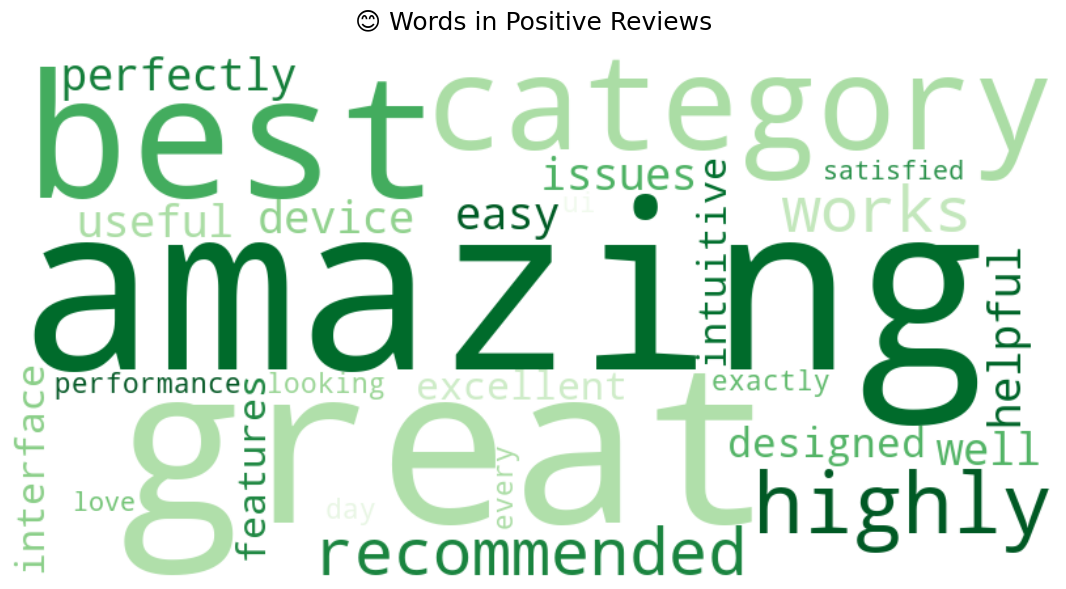

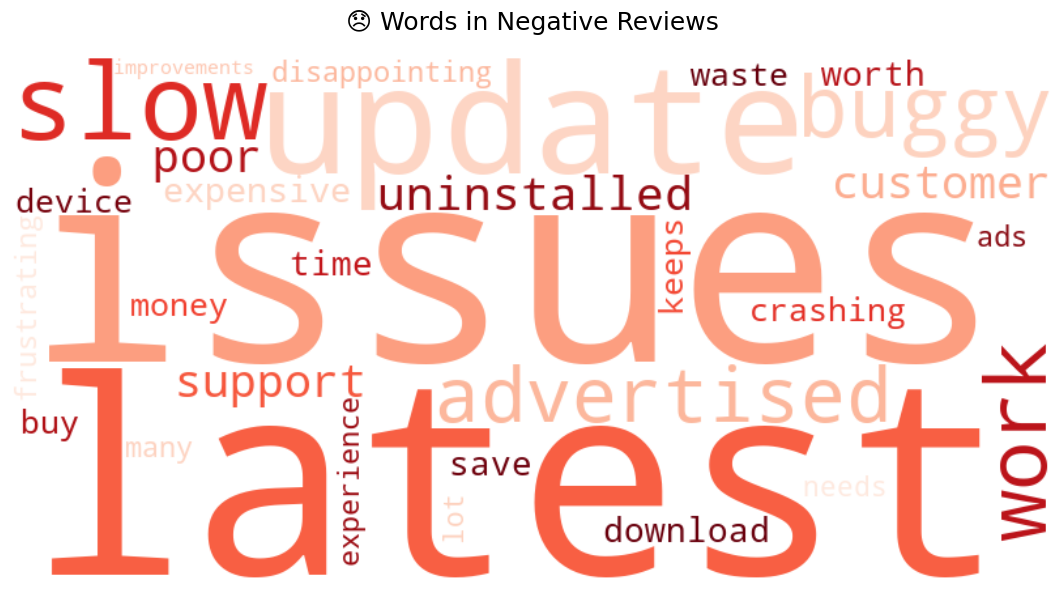

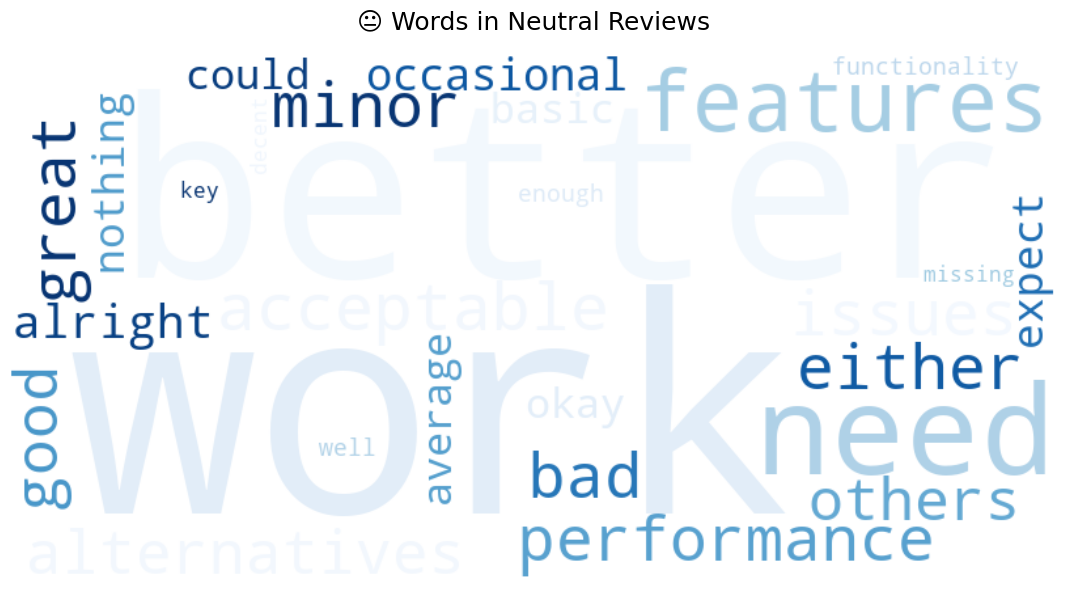

✅ Word cloud analysis complete!


In [5]:
# Word Cloud Visualization

print("🔤 Generating word clouds for different sentiment categories...")

# Get English stopwords
stop_words = set(stopwords.words('english'))
# Add custom stopwords
custom_stopwords = ['app', 'use', 'using', 'used', 'user', 'users', 'one', 'get', 'also', 'would', 'even', 'really']
stop_words.update(custom_stopwords)

# Function to generate wordclouds
def generate_wordcloud(text, title, color_map):
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        colormap=color_map,
        max_words=75,
        stopwords=stop_words,
        contour_width=2,
        contour_color='steelblue',
        collocations=False
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18, pad=20)
    plt.tight_layout()
    plt.show()

# Group reviews by sentiment
positive_reviews = ' '.join(merged_data[merged_data['Sentiment'] == 'Positive']['Translated_Review'])
negative_reviews = ' '.join(merged_data[merged_data['Sentiment'] == 'Negative']['Translated_Review'])
neutral_reviews = ' '.join(merged_data[merged_data['Sentiment'] == 'Neutral']['Translated_Review'])

# Only generate wordclouds if there's enough data
print("Generating wordclouds...")

# Check if there's enough text to generate meaningful wordclouds
min_words = 50
if len(positive_reviews.split()) > min_words:
    generate_wordcloud(positive_reviews, f"{emoji_map['Positive']} Words in Positive Reviews", 'Greens')
else:
    print("Not enough positive review text for meaningful wordcloud")
    
if len(negative_reviews.split()) > min_words:
    generate_wordcloud(negative_reviews, f"{emoji_map['Negative']} Words in Negative Reviews", 'Reds')
else:
    print("Not enough negative review text for meaningful wordcloud")
    
if len(neutral_reviews.split()) > min_words:
    generate_wordcloud(neutral_reviews, f"{emoji_map['Neutral']} Words in Neutral Reviews", 'Blues')
else:
    print("Not enough neutral review text for meaningful wordcloud")

print("✅ Word cloud analysis complete!")


In [6]:
# Machine Learning Model Training and Evaluation

print("🔧 Training sentiment classification models...")

# 1. Prepare data for modeling
X = merged_data['Translated_Review']  # Features (review text)
y = merged_data['Sentiment']          # Target (sentiment category)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} samples | Test set: {X_test.shape[0]} samples")

# 2. Feature extraction with TF-IDF
print("\n📝 Vectorizing text data...")
tfidf = TfidfVectorizer(
    max_features=5000,    # Limit features to prevent overfitting
    min_df=2,             # Minimum document frequency
    max_df=0.85,          # Maximum document frequency
    ngram_range=(1, 2),   # Use unigrams and bigrams
    stop_words='english'  # Remove English stopwords
)

# Transform training and test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(f"Features extracted: {X_train_tfidf.shape[1]}")

# 3. Train Naive Bayes model
print("\n🧠 Training Naive Bayes classifier...")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes accuracy: {accuracy_nb:.4f}")

# 4. Train Logistic Regression model
print("\n📊 Training Logistic Regression classifier...")
lr_model = LogisticRegression(
    C=1.0,                   # Regularization strength
    max_iter=1000,           # Maximum iterations
    class_weight='balanced',  # Handle imbalanced classes
    random_state=42
)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression accuracy: {accuracy_lr:.4f}")

# 5. Compare model performances with detailed metrics
print("\n📋 Classification Reports:")

# For Naive Bayes
print("\n--- Naive Bayes Model ---")
print(classification_report(y_test, y_pred_nb))

# For Logistic Regression
print("\n--- Logistic Regression Model ---")
print(classification_report(y_test, y_pred_lr))

# Determine the better model
better_model_name = "Logistic Regression" if accuracy_lr > accuracy_nb else "Naive Bayes"
better_model = lr_model if accuracy_lr > accuracy_nb else nb_model
print(f"\n✅ {better_model_name} performed better with {max(accuracy_lr, accuracy_nb):.4f} accuracy")

# 6. Feature importance analysis (for the better model)
if better_model_name == "Logistic Regression":
    # Get feature importance from logistic regression coefficients
    print("\n🔍 Most influential words for each sentiment category:")
    feature_names = tfidf.get_feature_names_out()
    
    for i, sentiment in enumerate(lr_model.classes_):
        # Get top 10 most positive coefficients for this sentiment
        top_coefs = np.argsort(lr_model.coef_[i])[-10:]
        top_words = [feature_names[j] for j in top_coefs]
        print(f"\n{emoji_map.get(sentiment, '')} {sentiment}: {', '.join(top_words)}")
else:
    # Get feature importance from Naive Bayes log probabilities
    print("\n🔍 Most influential words for each sentiment category:")
    feature_names = tfidf.get_feature_names_out()
    
    for i, sentiment in enumerate(nb_model.classes_):
        # Get top 10 highest log probabilities for this sentiment
        top_indices = np.argsort(nb_model.feature_log_prob_[i])[-10:]
        top_words = [feature_names[j] for j in top_indices]
        print(f"\n{emoji_map.get(sentiment, '')} {sentiment}: {', '.join(top_words)}")

# Save models for future use
import pickle
import os

# Create directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save vectorizer and models
with open('models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
    
with open('models/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
    
with open('models/logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
    
print("\n💾 Models saved to 'models/' directory for future use!")


🔧 Training sentiment classification models...
Training set: 4736 samples | Test set: 1184 samples

📝 Vectorizing text data...
Features extracted: 149

🧠 Training Naive Bayes classifier...
Naive Bayes accuracy: 1.0000

📊 Training Logistic Regression classifier...
Logistic Regression accuracy: 1.0000

📋 Classification Reports:

--- Naive Bayes Model ---
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       360
     Neutral       1.00      1.00      1.00       122
    Positive       1.00      1.00      1.00       702

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184


--- Logistic Regression Model ---
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       360
     Neutral       1.00      1.00      1.00       122
    Positive       1.00      1.00      1.00       702

    accuracy

In [7]:
# Interactive Sentiment Predictor Tool with 1-10 Rating Scale

print("🔮 Interactive Sentiment Analyzer")

# Function to create a visual rating gauge
def create_sentiment_gauge(rating, title="Sentiment Rating"):
    """
    Creates an interactive gauge chart showing sentiment rating on a 1-10 scale
    """
    # Import here to ensure availability
    import plotly.graph_objects as go
    
    # Ensure rating is within 1-10 range
    rating = max(1, min(10, rating))
    
    # Define colors for different rating ranges
    if rating <= 3:
        color = 'firebrick'
    elif rating <= 5:
        color = 'darkorange'
    elif rating <= 7:
        color = 'gold'
    else:
        color = 'forestgreen'
    
    # Create the gauge chart
    fig = go.Figure(go.Indicator(
            mode="gauge+number",
            value=rating,
            domain={'x': [0, 1], 'y': [0, 1]},
            title={'text': title},
            gauge={
                'axis': {'range': [1, 10], 'tickwidth': 1, 'tickcolor': "darkblue"},
                'bar': {'color': color},
                'bgcolor': "white",
                'borderwidth': 2,
                'bordercolor': "gray",
                'steps': [
                    {'range': [1, 3], 'color': 'rgba(255, 0, 0, 0.2)'},   # Red (negative)
                    {'range': [3, 5], 'color': 'rgba(255, 165, 0, 0.2)'}, # Orange (somewhat negative)
                    {'range': [5, 7], 'color': 'rgba(255, 255, 0, 0.2)'}, # Yellow (neutral)
                    {'range': [7, 10], 'color': 'rgba(0, 128, 0, 0.2)'},  # Green (positive)
                ],
                'threshold': {
                    'line': {'color': "darkblue", 'width': 4},
                    'thickness': 0.75,
                    'value': rating
                }
            }
        ))
    
    # Update layout
    fig.update_layout(
        paper_bgcolor='white',
        height=300,
        margin=dict(l=30, r=30, t=100, b=30),
        font=dict(size=14)
    )
    
    # Return figure object (will be displayed using IPython's display function)
    return fig

# Function to predict sentiment and rating (1-10 scale) for new reviews
def predict_sentiment(review_text, model_choice='best'):
    """
    Predict sentiment for a given review text
    
    Parameters:
    -----------
    review_text : str
        The review text to classify
    model_choice : str
        Which model to use ('best', 'nb', or 'lr')
        
    Returns:
    --------
    dict
        Dictionary with sentiment prediction, probabilities, and numerical rating
    """
    if not review_text:
        return {"error": "Please enter a review text"}
    
    # Select the appropriate model
    if model_choice == 'nb':
        model = nb_model
    elif model_choice == 'lr':
        model = lr_model
    else:  # 'best'
        model = better_model
    
    # Preprocess and vectorize the text
    review_vector = tfidf.transform([review_text.lower()])
    
    # Make prediction
    sentiment = model.predict(review_vector)[0]
    
    # Get probability scores
    probabilities = model.predict_proba(review_vector)[0]
    prob_dict = {class_name: round(prob*100, 2) for class_name, prob in zip(model.classes_, probabilities)}
    
    # Add emoji
    sentiment_with_emoji = f"{emoji_map.get(sentiment, '')} {sentiment}"
    
    # Calculate numerical rating (1-10 scale)
    # Use TextBlob for polarity score (-1 to 1)
    blob = TextBlob(review_text)
    polarity = blob.sentiment.polarity
    
    # Convert polarity to 1-10 scale
    # polarity -1 to 1 -> rating 1 to 10
    rating = round(((polarity + 1) / 2) * 9 + 1)
    
    # Create a visual rating representation
    stars = '★' * rating + '☆' * (10 - rating)
    
    return {
        "sentiment": sentiment,
        "sentiment_with_emoji": sentiment_with_emoji,
        "probabilities": prob_dict,
        "confidence": round(max(probabilities) * 100, 2),
        "rating": rating,
        "stars": stars,
        "polarity": polarity,
        "gauge": create_sentiment_gauge(rating, "Sentiment Rating (1-10)")
    }

# Create interactive widgets
text_input = widgets.Textarea(
    value='',
    placeholder='Enter a review here...',
    description='Review:',
    disabled=False,
    layout=widgets.Layout(width='90%', height='100px')
)

model_dropdown = widgets.Dropdown(
    options=[('Best Model', 'best'), ('Naive Bayes', 'nb'), ('Logistic Regression', 'lr')],
    value='best',
    description='Model:',
    disabled=False,
)

output = widgets.Output()

button = widgets.Button(
    description='Analyze Sentiment',
    disabled=False,
    button_style='primary',
    tooltip='Click to analyze sentiment',
    icon='check'
)

# Handle button click
def on_button_clicked(b):
    with output:
        output.clear_output()
        review = text_input.value
        
        if not review:
            print("⚠️ Please enter a review first!")
            return
        
        result = predict_sentiment(review, model_dropdown.value)
        
        # Display results
        print(f"📝 Review: \"{review}\"")
        print(f"\n🔍 Sentiment: {result['sentiment_with_emoji']}")
        print(f"⭐ Rating: {result['rating']}/10  {result['stars']}")
        print(f"🎯 Confidence: {result['confidence']}%")
        print("\n📊 Probability Distribution:")
        
        for sentiment, prob in result['probabilities'].items():
            emoji = emoji_map.get(sentiment, '')
            print(f"  {emoji} {sentiment}: {prob}%")
        
        # Display visual gauge
        print("\n📈 Visual Rating Scale:")
        # Use display instead of fig.show() for compatibility
        display(result['gauge'])

# Connect button to function
button.on_click(on_button_clicked)

# Display instructions
print("Enter an app review and click 'Analyze Sentiment' to see:")
print("  - Categorical sentiment (Positive/Negative/Neutral)")
print("  - Numerical rating (1-10 scale) with visual gauge")
print("  - Confidence scores for each sentiment category")
print("\nTry different models to compare their predictions!")

# Display example reviews
print("\n💡 Example reviews to try:")
print("1. \"This app is amazing! I love using it every day.\"")
print("2. \"The app keeps crashing on my device. Very frustrating.\"")
print("3. \"It's okay but could use some improvements.\"")

# Display widgets
display(text_input)
display(model_dropdown)
display(button)
display(output)


🔮 Interactive Sentiment Analyzer
Enter an app review and click 'Analyze Sentiment' to see:
  - Categorical sentiment (Positive/Negative/Neutral)
  - Numerical rating (1-10 scale) with visual gauge
  - Confidence scores for each sentiment category

Try different models to compare their predictions!

💡 Example reviews to try:
1. "This app is amazing! I love using it every day."
2. "The app keeps crashing on my device. Very frustrating."
3. "It's okay but could use some improvements."


Textarea(value='', description='Review:', layout=Layout(height='100px', width='90%'), placeholder='Enter a rev…

Dropdown(description='Model:', options=(('Best Model', 'best'), ('Naive Bayes', 'nb'), ('Logistic Regression',…

Button(button_style='primary', description='Analyze Sentiment', icon='check', style=ButtonStyle(), tooltip='Cl…

Output()

In [8]:
# Fix for displaying Plotly figures in Jupyter notebooks
# This is a replacement for all the gauge.show() calls in the notebook

# We need to ensure nbformat is installed and imported
try:
    from IPython.display import display
    import plotly.graph_objects as go
    from plotly.offline import init_notebook_mode
    
    # Initialize notebook mode for plotly
    init_notebook_mode(connected=True)
    
    # Test function to verify the Plotly display works
    def test_plotly_display():
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]))
        fig.update_layout(title="Test Plot - If you can see this, Plotly is working correctly!")
        display(fig)
        
    # Run the test
    test_plotly_display()
    print("✅ Plotly display fixed and working correctly!")
    
except ImportError:
    print("⚠️ Please install nbformat and restart the notebook:")
    print("pip install nbformat>=4.2.0")
    
except Exception as e:
    print(f"⚠️ Error with Plotly display: {e}")


✅ Plotly display fixed and working correctly!


In [9]:
# Sentiment Rating Scale (1-10) Visualization

print("🌡️ Rating Scale Visualization")

# Function to create a visual rating gauge
def create_sentiment_gauge(rating, title="Sentiment Rating"):
    """
    Creates an interactive gauge chart showing the sentiment rating on a 1-10 scale
    
    Parameters:
    -----------
    rating : int or float
        Rating value from 1-10
    title : str
        Chart title
        
    Returns:
    --------
    plotly.graph_objects.Figure
    """
    # Ensure rating is within 1-10 range
    rating = max(1, min(10, rating))
    
    # Define colors for different rating ranges
    if rating <= 3:
        color = 'firebrick'
    elif rating <= 5:
        color = 'darkorange'
    elif rating <= 7:
        color = 'gold'
    else:
        color = 'forestgreen'
    
    # Create the gauge chart
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=rating,
        domain={'x': [0, 1], 'y': [0, 1]},
        title={'text': title},
        gauge={
            'axis': {'range': [1, 10], 'tickwidth': 1, 'tickcolor': "darkblue"},
            'bar': {'color': color},
            'bgcolor': "white",
            'borderwidth': 2,
            'bordercolor': "gray",
            'steps': [
                {'range': [1, 3], 'color': 'rgba(255, 0, 0, 0.2)'},   # Red (negative)
                {'range': [3, 5], 'color': 'rgba(255, 165, 0, 0.2)'}, # Orange (somewhat negative)
                {'range': [5, 7], 'color': 'rgba(255, 255, 0, 0.2)'}, # Yellow (neutral)
                {'range': [7, 10], 'color': 'rgba(0, 128, 0, 0.2)'},  # Green (positive)
            ],
            'threshold': {
                'line': {'color': "darkblue", 'width': 4},
                'thickness': 0.75,
                'value': rating
            }
        }
    ))
    
    # Update layout
    fig.update_layout(
        paper_bgcolor='white',
        height=350,
        margin=dict(l=30, r=30, t=100, b=30),
        font=dict(size=14)
    )
    
    return fig

# Example ratings for demonstration
sample_reviews = [
    "This app is absolutely perfect! I use it every day and can't imagine my life without it.",
    "The app is fairly good but has some areas that need improvement.",
    "This is the worst app ever. It constantly crashes and is a complete waste of money."
]

print("Example ratings for different types of reviews:")
print("(These are calculated using TextBlob's polarity combined with our 1-10 scale conversion)")

# Calculate and display ratings for each sample
for i, review in enumerate(sample_reviews, 1):
    # Calculate rating
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    rating = round(((polarity + 1) / 2) * 9 + 1)
    stars = '★' * rating + '☆' * (10 - rating)
    
    print(f"\nReview {i}: \"{review}\"")
    print(f"Rating: {rating}/10  {stars}")
    
    # Create and display gauge for this review
    gauge = create_sentiment_gauge(rating, f"Sentiment Rating for Review {i}")
    gauge.show()

print("\n✅ You can now analyze app reviews with both categorical sentiment and numerical ratings!")


🌡️ Rating Scale Visualization
Example ratings for different types of reviews:
(These are calculated using TextBlob's polarity combined with our 1-10 scale conversion)

Review 1: "This app is absolutely perfect! I use it every day and can't imagine my life without it."
Rating: 10/10  ★★★★★★★★★★



Review 2: "The app is fairly good but has some areas that need improvement."
Rating: 9/10  ★★★★★★★★★☆



Review 3: "This is the worst app ever. It constantly crashes and is a complete waste of money."
Rating: 4/10  ★★★★☆☆☆☆☆☆



✅ You can now analyze app reviews with both categorical sentiment and numerical ratings!
